In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\archa\OneDrive\Desktop\New folder\aerofit.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [1]:
df.info()
# Most of the data in integer datatype

NameError: name 'df' is not defined

In [5]:
df.isnull().sum()/len(df)*100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

**Observation**
-As we can clearly see their is no NULL values present

In [7]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [8]:
df['age_bins']=pd.cut(x=df['Age'],bins=[0,18,28,38,48,58,68,100],
                     labels=['0-18','18-28','28-38','38-48','48-58','58-68','68-100'])
#  Adding Category i.e adding Age to age_bins

In [9]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,0-18
1,KP281,19,Male,15,Single,2,3,31836,75,18-28
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-28
3,KP281,19,Male,12,Single,3,3,32973,85,18-28
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-28
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,38-48
176,KP781,42,Male,18,Single,5,4,89641,200,38-48
177,KP781,45,Male,16,Single,5,5,90886,160,38-48
178,KP781,47,Male,18,Partnered,4,5,104581,120,38-48


In [10]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [11]:
# Checking diff between mean and median

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

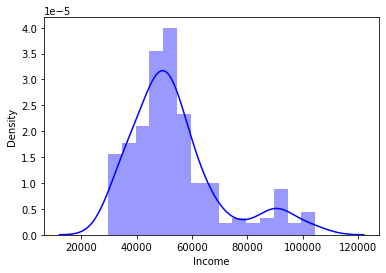

In [12]:
# Univeriant graph 

sns.distplot(df['Income'],color='blue')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Miles', ylabel='Density'>

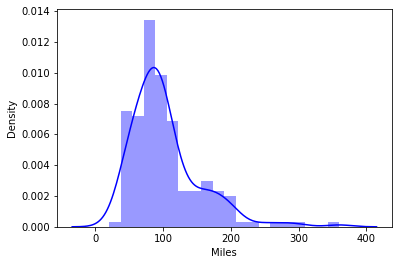

In [13]:
sns.distplot(df['Miles'],color='blue')

<AxesSubplot:xlabel='age_bins', ylabel='Count'>

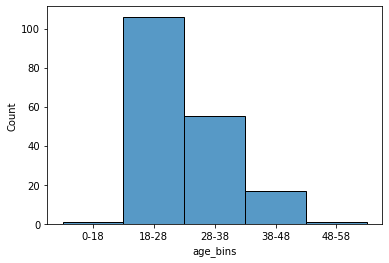

In [14]:
sns.histplot(x='age_bins',data=df)

In [15]:
# Can notice that maximum users are the 18-28 age group

<AxesSubplot:xlabel='MaritalStatus', ylabel='Count'>

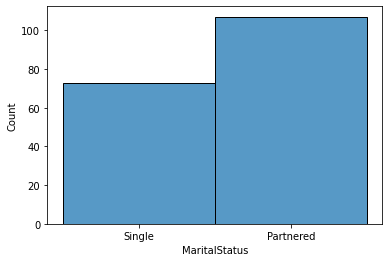

In [16]:
sns.histplot(x='MaritalStatus',data=df)

<AxesSubplot:xlabel='Gender', ylabel='Count'>

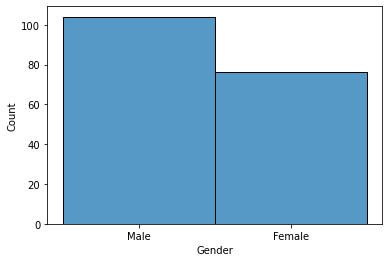

In [17]:
sns.histplot(x='Gender',data=df)

In [18]:
# Male are More

In [19]:
# Univarient 

<AxesSubplot:xlabel='Product', ylabel='Income'>

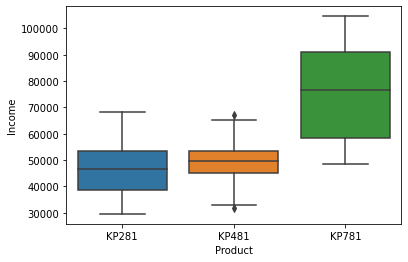

In [20]:
sns.boxplot(x='Product',y='Income',data=df)

In [21]:
# Here we can see that the Highest income clients are using the costliest Product
# We can also see here both Basic and Advanced Products are Used by more number of clients
# Advertising comparison of 3 models can make basic user push for buying at least  Mid version

<AxesSubplot:xlabel='Gender', ylabel='Income'>

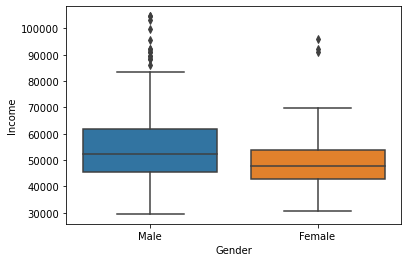

In [22]:
sns.boxplot(x='Gender',y='Income',data=df)

In [23]:
# observed that lot of outliers in Male compared to female

In [24]:
df.groupby('Gender')['Income'].mean()

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

In [25]:
# Removing Outliers

q1=df['Income'].quantile(0.25)
q3=df['Income'].quantile(0.75)
iqr=q3-q1

df=df[(df['Income']>q1-1.5*iqr)&(df['Income']<q3+1.5*iqr)]

In [26]:
df.groupby('Gender')['Income'].mean()

Gender
Female    48056.356164
Male      50000.840909
Name: Income, dtype: float64

In [27]:
# Outliers are removed

<AxesSubplot:xlabel='Gender', ylabel='Income'>

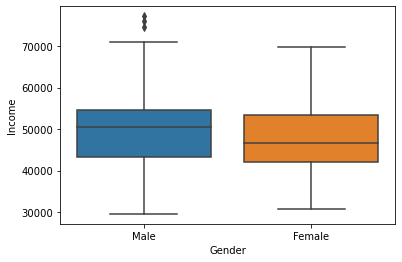

In [28]:
sns.boxplot(x='Gender',y='Income',data=df)

<AxesSubplot:xlabel='age_bins', ylabel='Income'>

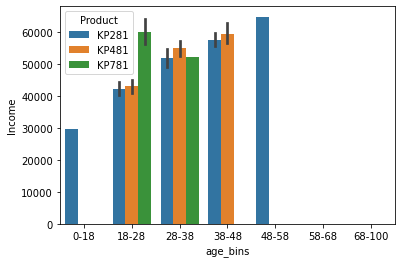

In [29]:
sns.barplot(x='age_bins',y='Income',hue='Product',data=df)

In [30]:
# Its noticable that as age increases Income also increases so must focus on aged people 

In [31]:

# To check which gender is using the products more
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,4,73
Male,40,31,17,88
All,80,60,21,161


In [32]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,24.844720,18.012422,2.484472,45.341615
Male,24.844720,19.254658,10.559006,54.658385
All,49.689441,37.267081,13.043478,100.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

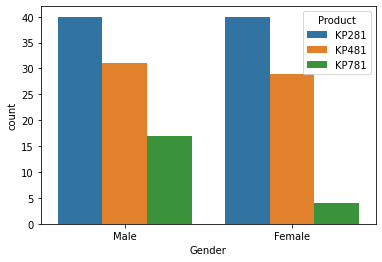

In [33]:
sns.countplot(x='Gender',hue='Product',data=df)

In [34]:
# Its notable that advanced product is mostly used by Male

<AxesSubplot:xlabel='Product', ylabel='count'>

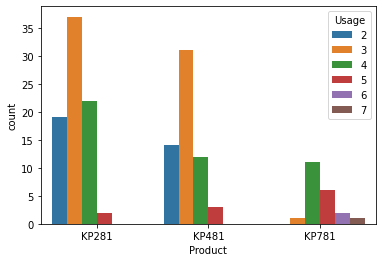

In [35]:
sns.countplot(x='Product',hue='Usage',data=df)

In [36]:
# Advanced Product is highly used among people who are buying it

In [37]:
df['Usage'].value_counts()

3    69
4    45
2    33
5    11
6     2
7     1
Name: Usage, dtype: int64

In [38]:
# Checking Unique values
df.nunique()

Product           3
Age              31
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           51
Miles            32
age_bins          5
dtype: int64

In [39]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.208992,-0.125330,-0.118570,0.551113,-0.165710
Education,0.208992,1.000000,0.315696,0.313260,0.600964,0.260524
Usage,-0.125330,0.315696,1.000000,0.578850,0.279502,0.744355
Fitness,-0.118570,0.313260,0.578850,1.000000,0.246177,0.780566
Income,0.551113,0.600964,0.279502,0.246177,1.000000,0.252686
Miles,-0.165710,0.260524,0.744355,0.780566,0.252686,1.000000


<AxesSubplot:>

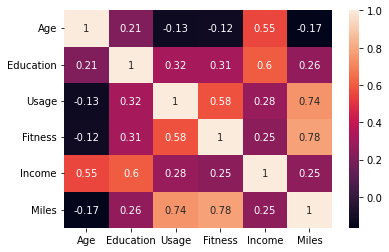

In [40]:
sns.heatmap(df.corr(),annot=True)

In [41]:
# Usage increases fitness also increases
# Miles increase fitness increases
# Age increases Income also increases

<AxesSubplot:xlabel='Age', ylabel='Income'>

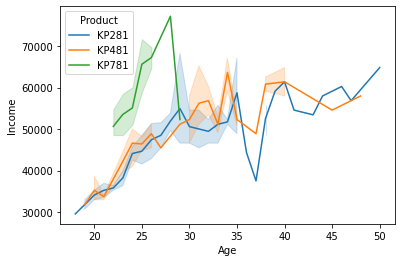

In [42]:
sns.lineplot(x='Age',y='Income',data=df, hue='Product')

In [43]:
# Highest Income customers are buying advanced products

In [44]:
df.groupby(['Gender','MaritalStatus','Product']).sum()['Miles'].unstack()

Product               KP281  KP481  KP781
Gender MaritalStatus                     
Female Partnered       2023   1410    200
       Single          1025   1123    400
Male   Partnered       1684   1832   1410
       Single          1891    911   1106

<AxesSubplot:xlabel='Education', ylabel='Age'>

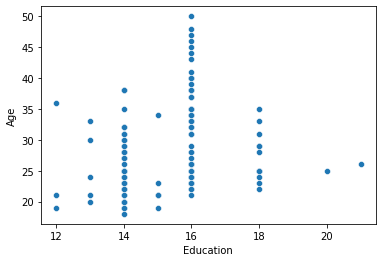

In [45]:
sns.scatterplot(x='Education',y='Age',data=df)

<AxesSubplot:xlabel='Age', ylabel='Income'>

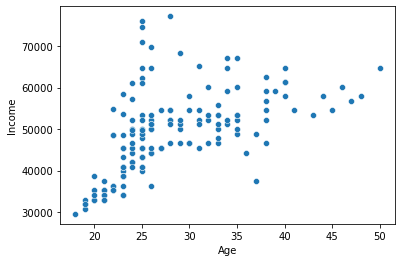

In [46]:
sns.scatterplot(x='Age',y='Income',data=df)

<AxesSubplot:xlabel='Product', ylabel='Usage'>

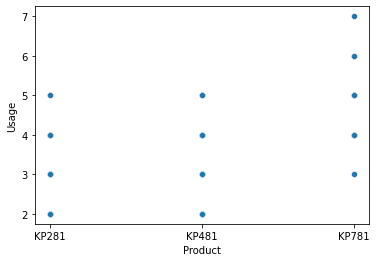

In [47]:
sns.scatterplot(x='Product',y='Usage',data=df)

In [48]:
# Usage of Advanced Product is High

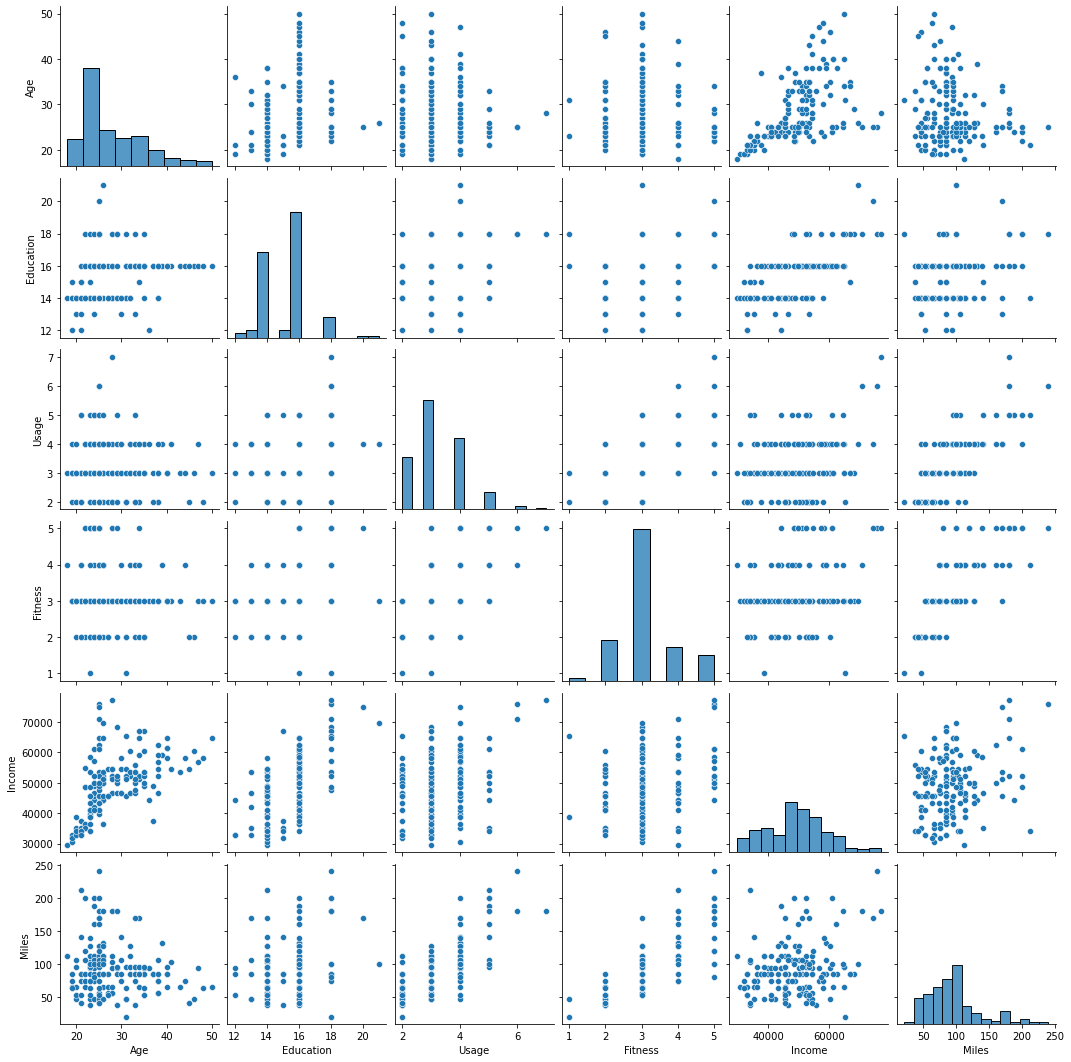

In [49]:
sns.pairplot(df)